In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfx=pd.read_csv('Training Data/Linear_X_Train.csv')
dfy=pd.read_csv('Training Data/Linear_Y_Train.csv')
x=dfx.values
y=dfy.values
x=x.reshape((-1))
y=y.reshape((-1))
X=(x-x.mean())/x.std()
Y=y
print(X.shape,Y.shape)

(3750,) (3750,)


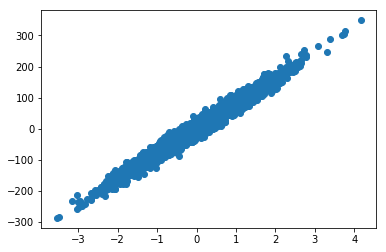

In [3]:
plt.scatter(X,Y)
plt.show()

In [4]:
def hypothesis(x,theta):
    return theta[0] + x*theta[1]

def error(X,Y,theta):
    m=X.shape[0]
    err=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        err+=(Y[i]-hx)**2
    return err    

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
        
    return grad

def gradientDescent(X,Y,learning_rate=0.0001):
    theta=np.zeros((2,))
    itr=0
    error_list=[]
    while(itr<=50):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
    return theta,error_list

[ 0.68386897 79.90573694]


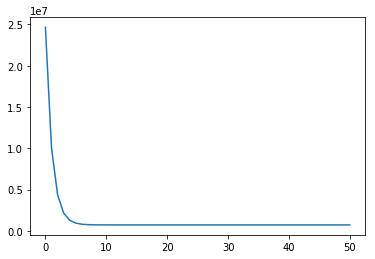

In [5]:
final_theta,error_list=gradientDescent(X,Y)
print(final_theta)
plt.plot(error_list)
plt.show()

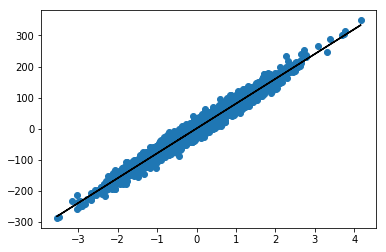

In [6]:
Y_pred=hypothesis(X,final_theta)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='k')
plt.show()

In [7]:
from sklearn.metrics import r2_score
print(r2_score(Y,Y_pred))

0.9709612233822353


In [8]:
dfx_test=pd.read_csv('Test Cases/Linear_X_Test.csv')
x_test=dfx_test.values
x_test=(x_test-x_test.mean())/x_test.std()
print(x_test.shape)
print(x)

(1250, 1)
[-0.28930742 -0.58880963  1.02750749 ... -0.30516366  1.67583291
 -0.49175724]


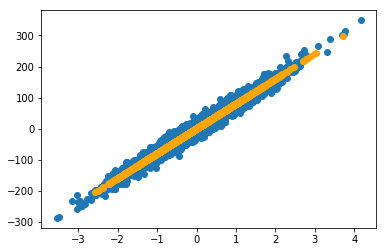

In [11]:
pred=hypothesis(x_test,final_theta)
plt.scatter(X,Y)
plt.scatter(x_test,pred,color='orange')
plt.show()
ans=pd.DataFrame(pred,columns=['y'])
ans.to_csv('submit.csv',index=False)